<a href="https://colab.research.google.com/github/leibo411/Unit-1-Build-Week/blob/main/William_Leibundgut_Unit1Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('https://www.ndbc.noaa.gov/view_text_file.php?filename=44098h2019.txt.gz&dir=data/historical/stdmet/', delimiter= '\s+', index_col=False)

In [3]:
df.head()

,#YY,MM,DD,hh,mm,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE
0,#yr,mo,dy,hr,mn,degT,m/s,m/s,m,sec,sec,degT,hPa,degC,degC,degC,mi,ft
1,2019,01,01,00,08,999,99.0,99.0,1.42,5.00,4.38,186,9999.0,999.0,7.3,999.0,99.0,99.00
2,2019,01,01,00,38,999,99.0,99.0,1.43,5.00,4.50,193,9999.0,999.0,7.3,999.0,99.0,99.00
3,2019,01,01,01,08,999,99.0,99.0,1.41,5.26,4.46,186,9999.0,999.0,7.2,999.0,99.0,99.00
4,2019,01,01,01,38,999,99.0,99.0,1.40,5.00,4.37,182,9999.0,999.0,7.2,999.0,99.0,99.00


In [4]:
#removal of unnecessary columns and the first row
del df['PRES']
del df['WTMP']
del df['VIS']
del df['TIDE']
del df['DEWP']
del df['MWD']
del df['ATMP']
del df['GST']
del df['WDIR']
del df['WSPD']
df = df.iloc[1:]

In [5]:
df.head()

,#YY,MM,DD,hh,mm,WVHT,DPD,APD
1,2019,01,01,00,08,1.42,5.00,4.38
2,2019,01,01,00,38,1.43,5.00,4.50
3,2019,01,01,01,08,1.41,5.26,4.46
4,2019,01,01,01,38,1.40,5.00,4.37
5,2019,01,01,02,08,1.40,5.26,4.43


In [6]:
df.isnull().sum()

#YY     0
MM      0
DD      0
hh      0
mm      0
WVHT    0
DPD     0
APD     0
dtype: int64

In [7]:
#any numbers over 10 were considered strings so I had to convert them to numberic values
df['WVHT'] = pd.to_numeric(df.WVHT)
df['DPD'] = pd.to_numeric(df.DPD)
df['APD'] = pd.to_numeric(df.APD)

max_wvht = df['WVHT'].max()
max_dpd = df['DPD'].max()
max_apd = df['APD'].max()

print(max_wvht)
print(max_dpd)
print(max_apd)

6.76
18.18
12.8


In [8]:
# define some of our constant values 
import math
rho = 1024 #density of saltwater in kg/m^3
g = 9.81 #gravitational constant in m/s^2
pi = math.pi #defines pi

In [9]:
# calculate wave power for all T(dominant wave period) and H
df['Wave Power'] = ((rho*g**2)/(64*pi))*df['WVHT']*df['DPD']
max_wvpr = df['Wave Power'].max()
print(max_wvpr)

40619.228102085544


In [10]:
df.head()

,#YY,MM,DD,hh,mm,WVHT,DPD,APD,Wave Power
1,2019,01,01,00,08,1.42,5.00,4.38,3479.897671
2,2019,01,01,00,38,1.43,5.00,4.50,3504.403993
3,2019,01,01,01,08,1.41,5.26,4.46,3635.071700
4,2019,01,01,01,38,1.40,5.00,4.37,3430.885028
5,2019,01,01,02,08,1.40,5.26,4.43,3609.291050


In [11]:
#combine the year/month/day/time
#[Date] + " " + [Time] 
df['Date'] = df['#YY'] + '-' + df['MM'] + '-' + df['DD'] + ' ' + df['hh'] + ':' + df['mm']
df.head()

,#YY,MM,DD,hh,mm,WVHT,DPD,APD,Wave Power,Date
1,2019,01,01,00,08,1.42,5.00,4.38,3479.897671,2019-01-01 00:08
2,2019,01,01,00,38,1.43,5.00,4.50,3504.403993,2019-01-01 00:38
3,2019,01,01,01,08,1.41,5.26,4.46,3635.071700,2019-01-01 01:08
4,2019,01,01,01,38,1.40,5.00,4.37,3430.885028,2019-01-01 01:38
5,2019,01,01,02,08,1.40,5.26,4.43,3609.291050,2019-01-01 02:08


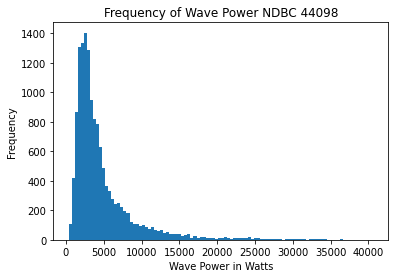

40619.228102085544


In [12]:
#lets think, it might be easier to average wave power/statistics over each month if I keep the months in a seperate column where it equals 01, 02, ...
#I could then compare monthly wave data (into a completely new df) and plot that. every half an hour is unnecesarry.

#lets try to make a histogram
fig, ax = plt.subplots()

num_bins = 100
ax.hist(df['Wave Power'],num_bins)
ax.set_title('Frequency of Wave Power NDBC 44098')
ax.set_xlabel('Wave Power in Watts')
ax.set_ylabel('Frequency')

plt.show()

#check to see if this makes sense
max_power = df['Wave Power'].max()
print(max_power)


In [13]:
# Lets try to repeat this for Rhode Island
dfRI = pd.read_csv('https://www.ndbc.noaa.gov/view_text_file.php?filename=44097h2019.txt.gz&dir=data/historical/stdmet/', delimiter= '\s+', index_col=False)
dfRI.head()

,#YY,MM,DD,hh,mm,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE
0,#yr,mo,dy,hr,mn,degT,m/s,m/s,m,sec,sec,degT,hPa,degC,degC,degC,mi,ft
1,2019,01,01,00,00,999,99.0,99.0,1.14,4.35,4.11,158,9999.0,999.0,8.7,999.0,99.0,99.00
2,2019,01,01,00,30,999,99.0,99.0,1.23,4.55,4.13,159,9999.0,999.0,8.7,999.0,99.0,99.00
3,2019,01,01,01,00,999,99.0,99.0,1.21,4.35,4.21,158,9999.0,999.0,8.7,999.0,99.0,99.00
4,2019,01,01,01,30,999,99.0,99.0,1.38,5.00,4.37,156,9999.0,999.0,8.7,999.0,99.0,99.00


In [14]:
del dfRI['PRES']
del dfRI['WTMP']
del dfRI['VIS']
del dfRI['TIDE']
del dfRI['DEWP']
del dfRI['MWD']
del dfRI['ATMP']
del dfRI['GST']
del dfRI['WDIR']
del dfRI['WSPD']
dfRI = dfRI.iloc[1:]
dfRI.head()

,#YY,MM,DD,hh,mm,WVHT,DPD,APD
1,2019,01,01,00,00,1.14,4.35,4.11
2,2019,01,01,00,30,1.23,4.55,4.13
3,2019,01,01,01,00,1.21,4.35,4.21
4,2019,01,01,01,30,1.38,5.00,4.37
5,2019,01,01,02,00,1.42,5.00,4.30


In [15]:
dfRI.isnull().sum()

#YY     0
MM      0
DD      0
hh      0
mm      0
WVHT    0
DPD     0
APD     0
dtype: int64

In [16]:
#any numbers over 10 were considered strings so I had to convert them to numberic values
dfRI['WVHT'] = pd.to_numeric(dfRI.WVHT)
dfRI['DPD'] = pd.to_numeric(dfRI.DPD)
dfRI['APD'] = pd.to_numeric(dfRI.APD)

max_wvht = dfRI['WVHT'].max()
max_dpd = dfRI['DPD'].max()
max_apd = dfRI['APD'].max()
max_values = dfRI.max()

print(max_wvht)
print(max_dpd)
print(max_apd)
print(max_values)

6.15
16.67
10.47
#YY      2019
MM         12
DD         31
hh         23
mm         30
WVHT     6.15
DPD     16.67
APD     10.47
dtype: object


In [17]:
dfRI['Wave Power'] = ((rho*g**2)/(64*pi))*dfRI['WVHT']*dfRI['DPD']
dfRI.head()
max_wvprri = dfRI['Wave Power'].max()
print(max_wvprri)

36980.627491717365


In [18]:
dfRI['Date'] = dfRI['#YY'] + '-' + dfRI['MM'] + '-' + dfRI['DD'] + ' ' + dfRI['hh'] + ':' + dfRI['mm']
dfRI.head()

,#YY,MM,DD,hh,mm,WVHT,DPD,APD,Wave Power,Date
1,2019,01,01,00,00,1.14,4.35,4.11,2430.536979,2019-01-01 00:00
2,2019,01,01,00,30,1.23,4.55,4.13,2742.992580,2019-01-01 00:30
3,2019,01,01,01,00,1.21,4.35,4.21,2579.780478,2019-01-01 01:00
4,2019,01,01,01,30,1.38,5.00,4.37,3381.872385,2019-01-01 01:30
5,2019,01,01,02,00,1.42,5.00,4.30,3479.897671,2019-01-01 02:00


In [19]:
# calculate the yearly mean for NH and RI
yr_mean_nh = df['Wave Power'].mean()
yr_mean_RI = dfRI['Wave Power'].mean()
print(yr_mean_nh)
print(yr_mean_RI)

4760.549244984579
5265.620687785058


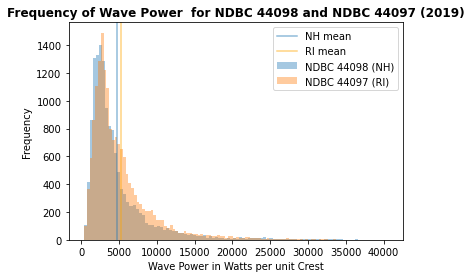

36980.627491717365


In [20]:
#make a histogram combining NH and RI
fig, ax = plt.subplots()

num_bins = 100
ax.hist(df['Wave Power'],num_bins, alpha=0.4, label='NDBC 44098 (NH)')
ax.hist(dfRI['Wave Power'],num_bins, alpha=0.4, label='NDBC 44097 (RI)')


plt.axvline(x=yr_mean_nh, alpha = 0.5, label='NH mean')
plt.axvline(x=yr_mean_RI, alpha = 0.5, label='RI mean', color='orange' )

ax.set_title('Frequency of Wave Power  for NDBC 44098 and NDBC 44097 (2019)', weight='bold', fontsize = 12)
ax.set_xlabel('Wave Power in Watts per unit Crest')
ax.set_ylabel('Frequency')

leg = ax.legend();

plt.show()

#check to see if this makes sense
max_power = dfRI['Wave Power'].max()
print(max_power)

In [21]:
#lets try to get some wind data close to NDBC 44098 to analyze correlation between wind and wave period?
df_wind = pd.read_csv('https://www.ndbc.noaa.gov/view_text_file.php?filename=iosn3c2019.txt.gz&dir=data/historical/cwind/', delimiter= '\s+', index_col=False)
df_wind.head()

,#YY,MM,DD,hh,mm,WDIR,WSPD,GDR,GST,GTIME
0,#yr,mo,dy,hr,mn,degT,m/s,degT,m/s,hhmm
1,2018,12,31,23,10,183,7.5,999,99.0,9999
2,2018,12,31,23,20,190,8.0,999,99.0,9999
3,2018,12,31,23,30,193,9.2,999,99.0,9999
4,2018,12,31,23,40,189,10.3,999,99.0,9999


In [22]:
df_wind = df_wind.iloc[1:]
del df_wind['WDIR']
del df_wind['GDR']
del df_wind['GST']
del df_wind['GTIME']
df_wind.head()

,#YY,MM,DD,hh,mm,WSPD
1,2018,12,31,23,10,7.5
2,2018,12,31,23,20,8.0
3,2018,12,31,23,30,9.2
4,2018,12,31,23,40,10.3
5,2018,12,31,23,50,11.2


In [23]:
df_wind['Date'] = df_wind['#YY'] + '-' + df_wind['MM'] + '-' + df_wind['DD'] + ' ' + df_wind['hh'] + ':' + df_wind['mm']
df_wind.head()

,#YY,MM,DD,hh,mm,WSPD,Date
1,2018,12,31,23,10,7.5,2018-12-31 23:10
2,2018,12,31,23,20,8.0,2018-12-31 23:20
3,2018,12,31,23,30,9.2,2018-12-31 23:30
4,2018,12,31,23,40,10.3,2018-12-31 23:40
5,2018,12,31,23,50,11.2,2018-12-31 23:50


In [24]:
#the first five elements are from 2018 so lets remove them
df_wind = df_wind.iloc[5:]
df_wind.head()
a = df_wind.shape
b = df.shape
print(a)
print(b)

(48116, 7)
(14181, 10)


In [25]:
#Isolate the necessary month
df_new_testRI1 = dfRI.loc[dfRI['MM']=='01']
df_new_testRI2 = dfRI.loc[dfRI['MM']=='02']
df_new_testRI3 = dfRI.loc[dfRI['MM']=='03']
df_new_testRI4 = dfRI.loc[dfRI['MM']=='04']
df_new_testRI5 = dfRI.loc[dfRI['MM']=='05']
df_new_testRI6 = dfRI.loc[dfRI['MM']=='06']
df_new_testRI7 = dfRI.loc[dfRI['MM']=='07']
df_new_testRI8 = dfRI.loc[dfRI['MM']=='08']
df_new_testRI9 = dfRI.loc[dfRI['MM']=='09']
df_new_testRI10 = dfRI.loc[dfRI['MM']=='10']
df_new_testRI11 = dfRI.loc[dfRI['MM']=='11']
df_new_testRI12 = dfRI.loc[dfRI['MM']=='12']

#Isolate wave power month 1
df_new_test2RI1 = df_new_testRI1[['Wave Power']].copy()
df_new_test2RI1.columns = ['Wave Power RI']
df_new_test2RI1 = df_new_test2RI1.reset_index(drop=True)

df_new_test2RI2 = df_new_testRI2[['Wave Power']].copy()
df_new_test2RI2.columns = ['Wave Power RI']
df_new_test2RI2 = df_new_test2RI2.reset_index(drop=True)

df_new_test2RI3 = df_new_testRI3[['Wave Power']].copy()
df_new_test2RI3.columns = ['Wave Power RI']
df_new_test2RI3 = df_new_test2RI3.reset_index(drop=True)

df_new_test2RI4 = df_new_testRI4[['Wave Power']].copy()
df_new_test2RI4.columns = ['Wave Power RI']
df_new_test2RI4 = df_new_test2RI4.reset_index(drop=True)

df_new_test2RI5 = df_new_testRI5[['Wave Power']].copy()
df_new_test2RI5.columns = ['Wave Power RI']
df_new_test2RI5 = df_new_test2RI5.reset_index(drop=True)

df_new_test2RI6 = df_new_testRI6[['Wave Power']].copy()
df_new_test2RI6.columns = ['Wave Power RI']
df_new_test2RI6 = df_new_test2RI6.reset_index(drop=True)

df_new_test2RI7 = df_new_testRI7[['Wave Power']].copy()
df_new_test2RI7.columns = ['Wave Power RI']
df_new_test2RI7 = df_new_test2RI7.reset_index(drop=True)

df_new_test2RI8 = df_new_testRI8[['Wave Power']].copy()
df_new_test2RI8.columns = ['Wave Power RI']
df_new_test2RI8 = df_new_test2RI8.reset_index(drop=True)

df_new_test2RI9 = df_new_testRI9[['Wave Power']].copy()
df_new_test2RI9.columns = ['Wave Power RI']
df_new_test2RI9 = df_new_test2RI9.reset_index(drop=True)

df_new_test2RI10 = df_new_testRI10[['Wave Power']].copy()
df_new_test2RI10.columns = ['Wave Power RI']
df_new_test2RI10 = df_new_test2RI10.reset_index(drop=True)

df_new_test2RI11 = df_new_testRI11[['Wave Power']].copy()
df_new_test2RI11.columns = ['Wave Power RI']
df_new_test2RI11 = df_new_test2RI11.reset_index(drop=True)

df_new_test2RI12 = df_new_testRI12[['Wave Power']].copy()
df_new_test2RI12.columns = ['Wave Power RI']
df_new_test2RI12 = df_new_test2RI12.reset_index(drop=True)
df_new_test2RI12.head()

,Wave Power RI
0,2921.398602
1,3452.842692
2,3336.192601
3,3675.948245
4,3308.353420


In [26]:
#Isolate the necessary month

# NEED TO RESET THE INDEX FOR ALL OF THESE!!!


df_new_test1 = df.loc[df['MM']=='01']
df_new_test2 = df.loc[df['MM']=='02']
df_new_test3 = df.loc[df['MM']=='03']
df_new_test4 = df.loc[df['MM']=='04']
df_new_test5 = df.loc[df['MM']=='05']
df_new_test6 = df.loc[df['MM']=='06']
df_new_test7 = df.loc[df['MM']=='07']
df_new_test8 = df.loc[df['MM']=='08']
df_new_test9 = df.loc[df['MM']=='09']
df_new_test10 = df.loc[df['MM']=='10']
df_new_test11 = df.loc[df['MM']=='11']
df_new_test12 = df.loc[df['MM']=='12']

#Isolate wave power month 1
df_new_test1 = df_new_test1[['Wave Power']].copy()
df_new_test1.columns = ['Wave Power NH']
df_new_test1 = df_new_test1.reset_index(drop=True)


df_new_test2 = df_new_test2[['Wave Power']].copy()
df_new_test2.columns = ['Wave Power NH']
df_new_test2 = df_new_test2.reset_index(drop=True)

df_new_test3 = df_new_test3[['Wave Power']].copy()
df_new_test3.columns = ['Wave Power NH']
df_new_test3 = df_new_test3.reset_index(drop=True)

df_new_test4 = df_new_test4[['Wave Power']].copy()
df_new_test4.columns = ['Wave Power NH']
df_new_test4 = df_new_test4.reset_index(drop=True)

df_new_test5 = df_new_test5[['Wave Power']].copy()
df_new_test5.columns = ['Wave Power NH']
df_new_test5 = df_new_test5.reset_index(drop=True)

df_new_test6 = df_new_test6[['Wave Power']].copy()
df_new_test6.columns = ['Wave Power NH']
df_new_test6 = df_new_test6.reset_index(drop=True)

df_new_test7 = df_new_test7[['Wave Power']].copy()
df_new_test7.columns = ['Wave Power NH']
df_new_test7 = df_new_test7.reset_index(drop=True)

df_new_test8 = df_new_test8[['Wave Power']].copy()
df_new_test8.columns = ['Wave Power NH']
df_new_test8 = df_new_test8.reset_index(drop=True)

df_new_test9 = df_new_test9[['Wave Power']].copy()
df_new_test9.columns = ['Wave Power NH']
df_new_test9 = df_new_test9.reset_index(drop=True)

df_new_test10 = df_new_test10[['Wave Power']].copy()
df_new_test10.columns = ['Wave Power NH']
df_new_test10 = df_new_test10.reset_index(drop=True)

df_new_test11 = df_new_test11[['Wave Power']].copy()
df_new_test11.columns = ['Wave Power NH']
df_new_test11 = df_new_test11.reset_index(drop=True)

df_new_test12 = df_new_test12[['Wave Power']].copy()
df_new_test12.columns = ['Wave Power NH']
df_new_test12 = df_new_test12.reset_index(drop=True)



In [27]:
# Combine the wave power NH and RI dataframes for the given months
merge_test1 = pd.concat([df_new_test2RI1, df_new_test1], axis=1)
merge_test1.head()
merge_test1.isnull().sum()

# remove the null values
merge_test1 = merge_test1.dropna()
merge_test1.isnull().sum()

# calculate the mean WAVE POWER!
df_mean1 = merge_test1[['Wave Power NH', 'Wave Power RI']].mean()
print(df_mean1)

Wave Power NH    5635.970798
Wave Power RI    6813.411606
dtype: float64


In [28]:
# Combine the wave power NH and RI dataframes for the given months
merge_test2 = pd.concat([df_new_test2RI2, df_new_test2], axis=1)
merge_test2.head()
merge_test2.isnull().sum()

# remove the null values
merge_test2 = merge_test2.dropna()
merge_test2.isnull().sum()

# calculate the mean WAVE POWER!
df_mean2 = merge_test2[['Wave Power NH', 'Wave Power RI']].mean()
print(df_mean2)

Wave Power NH    4695.527841
Wave Power RI    5115.324461
dtype: float64


In [29]:
# Combine the wave power NH and RI dataframes for the given months
merge_test3 = pd.concat([df_new_test2RI3, df_new_test3], axis=1)
merge_test3.head()
merge_test3.isnull().sum()

# remove the null values
merge_test3 = merge_test3.dropna()
merge_test3.isnull().sum()

# calculate the mean WAVE POWER!
df_mean3 = merge_test3[['Wave Power NH', 'Wave Power RI']].mean()
print(df_mean3)

Wave Power NH    4872.422797
Wave Power RI    5211.168313
dtype: float64


In [30]:
# Combine the wave power NH and RI dataframes for the given months
merge_test4 = pd.concat([df_new_test2RI4, df_new_test4], axis=1)
merge_test4.head()
merge_test4.isnull().sum()

# remove the null values
merge_test4 = merge_test4.dropna()
merge_test4.isnull().sum()

# calculate the mean WAVE POWER!
df_mean4 = merge_test4[['Wave Power NH', 'Wave Power RI']].mean()
print(df_mean4)

Wave Power NH    5006.150176
Wave Power RI    4762.877656
dtype: float64


In [31]:
# Combine the wave power NH and RI dataframes for the given months
merge_test5 = pd.concat([df_new_test2RI5, df_new_test5], axis=1)
merge_test5.head()
merge_test5.isnull().sum()

# remove the null values
merge_test5 = merge_test5.dropna()
merge_test5.isnull().sum()

# calculate the mean WAVE POWER!
df_mean5 = merge_test5[['Wave Power NH', 'Wave Power RI']].mean()
print(df_mean5)

Wave Power NH    4331.519058
Wave Power RI    4090.991583
dtype: float64


In [32]:
# Combine the wave power NH and RI dataframes for the given months
merge_test6 = pd.concat([df_new_test2RI6, df_new_test6], axis=1)
merge_test6.head()
merge_test6.isnull().sum()

# remove the null values
merge_test6 = merge_test6.dropna()
merge_test6.isnull().sum()

# calculate the mean WAVE POWER!
df_mean6 = merge_test6[['Wave Power NH', 'Wave Power RI']].mean()
print(df_mean6)

Wave Power NH    2659.113928
Wave Power RI    3644.444143
dtype: float64


In [33]:
# Combine the wave power NH and RI dataframes for the given months
merge_test7 = pd.concat([df_new_test2RI7, df_new_test7], axis=1)
merge_test7.head()
merge_test7.isnull().sum()

# remove the null values
merge_test7 = merge_test7.dropna()
merge_test7.isnull().sum()

# calculate the mean WAVE POWER!
df_mean7 = merge_test7[['Wave Power NH', 'Wave Power RI']].mean()
print(df_mean7)

Wave Power NH    2488.413026
Wave Power RI    3006.838597
dtype: float64


In [34]:
# Combine the wave power NH and RI dataframes for the given months
merge_test8 = pd.concat([df_new_test2RI8, df_new_test8], axis=1)
merge_test8.head()
merge_test8.isnull().sum()

# remove the null values
merge_test8 = merge_test8.dropna()
merge_test8.isnull().sum()

# calculate the mean WAVE POWER!
df_mean8 = merge_test8[['Wave Power NH', 'Wave Power RI']].mean()
print(df_mean8)

Wave Power NH    3303.867208
Wave Power RI    3652.644795
dtype: float64


In [35]:
# Combine the wave power NH and RI dataframes for the given months
merge_test9 = pd.concat([df_new_test2RI9, df_new_test9], axis=1)
merge_test9.head()
merge_test9.isnull().sum()

# remove the null values
merge_test9 = merge_test9.dropna()
merge_test9.isnull().sum()

# calculate the mean WAVE POWER!
df_mean9 = merge_test9[['Wave Power NH', 'Wave Power RI']].mean()
print(df_mean9)

Wave Power NH    4101.428746
Wave Power RI    5264.332292
dtype: float64


In [36]:
# Combine the wave power NH and RI dataframes for the given months
merge_test10 = pd.concat([df_new_test2RI10, df_new_test10], axis=1)
merge_test10.head()
merge_test10.isnull().sum()

# remove the null values
merge_test10 = merge_test10.dropna()
merge_test10.isnull().sum()

# calculate the mean WAVE POWER!
df_mean10 = merge_test10[['Wave Power NH', 'Wave Power RI']].mean()
print(df_mean10)

Wave Power NH    8234.950091
Wave Power RI    7790.902868
dtype: float64


In [37]:
# Combine the wave power NH and RI dataframes for the given months
merge_test11 = pd.concat([df_new_test2RI11, df_new_test11], axis=1)
merge_test11.head()
merge_test11.isnull().sum()

# remove the null values
merge_test11 = merge_test11.dropna()
merge_test11.isnull().sum()

# calculate the mean WAVE POWER!
df_mean11 = merge_test11[['Wave Power NH', 'Wave Power RI']].mean()
print(df_mean11)

Wave Power NH    5747.266070
Wave Power RI    6155.032946
dtype: float64


In [38]:
# Combine the wave power NH and RI dataframes for the given months
merge_test12 = pd.concat([df_new_test2RI12, df_new_test12], axis=1)
merge_test12.head()
merge_test12.isnull().sum()

# remove the null values
merge_test12 = merge_test12.dropna()
merge_test12.isnull().sum()

# calculate the mean WAVE POWER!
df_mean12 = merge_test12[['Wave Power NH', 'Wave Power RI']].mean()
print(df_mean12)

Wave Power NH    6087.974561
Wave Power RI    6776.659071
dtype: float64


In [39]:
#combine all of the mean power values into a column and create a column of month values
Month = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
mean_nh = [df_mean1[0], df_mean2[0], df_mean3[0], df_mean4[0], df_mean5[0], df_mean6[0], df_mean7[0], df_mean8[0], df_mean9[0], df_mean10[0], df_mean11[0], df_mean12[0]]
mean_ri = [df_mean1[1], df_mean2[1], df_mean3[1], df_mean4[1], df_mean5[1], df_mean6[1], df_mean7[1], df_mean8[1], df_mean9[1], df_mean10[1], df_mean11[1], df_mean12[1]]

print(mean_nh)
print(mean_ri)
print(Month)

[5635.970798342868, 4695.527840638817, 4872.422797217975, 5006.150176155771, 4331.5190582684845, 2659.1139280975017, 2488.4130261876803, 3303.867208337179, 4101.428746238481, 8234.95009061587, 5747.266070035804, 6087.97456113648]
[6813.411606454507, 5115.324460638174, 5211.168313061068, 4762.877655626135, 4090.991583045448, 3644.4441427609095, 3006.838597259911, 3652.6447945734867, 5264.332292109703, 7790.902867935504, 6155.03294617319, 6776.659070855742]
['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']


In [40]:
list_of_tuples = list(zip(Month, mean_nh, mean_ri))
df_final = pd.DataFrame(list_of_tuples, columns = ['Month', 'Mean Wave Power NH', 'Mean Wave Power RI'])
df_final.head(12)

,Month,Mean Wave Power NH,Mean Wave Power RI
0,January,5635.970798,6813.411606
1,February,4695.527841,5115.324461
2,March,4872.422797,5211.168313
3,April,5006.150176,4762.877656
4,May,4331.519058,4090.991583
5,June,2659.113928,3644.444143
6,July,2488.413026,3006.838597
7,August,3303.867208,3652.644795
8,September,4101.428746,5264.332292
9,October,8234.950091,7790.902868


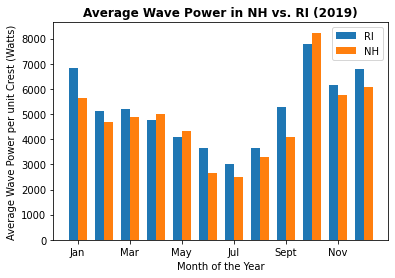

In [41]:
index = np.arange(12)
bar_width = 0.35

fig, ax = plt.subplots()
RI = ax.bar(index-(bar_width/2), df_final['Mean Wave Power RI'], bar_width,
                label='RI')

NH = ax.bar(index+(bar_width/2), df_final['Mean Wave Power NH'], bar_width,
                label='NH')

ax.set_title('Average Wave Power in NH vs. RI (2019)', weight='bold', fontsize=12)
ax.set_ylabel('Average Wave Power per unit Crest (Watts)')
ax.set_xlabel('Month of the Year')
#ax.set_xticklabels(index + (bar_width/2) ,['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12'])
ax.set_xticklabels(['Jan', 'Jan', 'Mar', 'May', 'Jul', 'Sept', 'Nov'])
ax.legend()


plt.show()

Text(0, 0.5, 'Wave Height (m)')

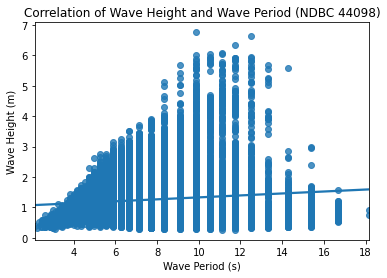

In [42]:
import seaborn as sns

ax = sns.regplot(x='DPD', y='WVHT', data=df, ci=None)
ax.set_title('Correlation of Wave Height and Wave Period (NDBC 44098)')
ax.set_xlabel('Wave Period (s)')
ax.set_ylabel('Wave Height (m)')

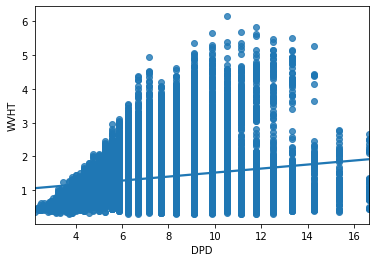

In [43]:
import seaborn as sns

ax = sns.regplot(x='DPD', y='WVHT', data=dfRI, ci=None)

In [44]:
r = np.corrcoef(df['DPD'], df['WVHT'])
print(r)

[[1.         0.10895748]
 [0.10895748 1.        ]]
